In [1]:
import pandas as pd
import numpy as np
import  sklearn as sk
from sklearn.decomposition import FactorAnalysis
from sklearn import datasets
from sklearn.preprocessing import scale

In [2]:
iris=datasets.load_iris()
X=iris.data
variables=iris.feature_names
x_normal=scale(X)

In [3]:
variables

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
x_normal[:10,]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ],
       [-0.53717756,  1.93979142, -1.16971425, -1.05217993],
       [-1.50652052,  0.78880759, -1.34022653, -1.18381211],
       [-1.02184904,  0.78880759, -1.2833891 , -1.3154443 ],
       [-1.74885626, -0.36217625, -1.34022653, -1.3154443 ],
       [-1.14301691,  0.09821729, -1.2833891 , -1.44707648]])

In [5]:
factor=FactorAnalysis().fit(x_normal)

In [6]:
pd.DataFrame(factor.components_, columns=variables)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.839139,-0.364774,0.920334,0.901935
1,0.122953,0.339799,-0.019313,-0.009076
2,-0.000000,0.000000,0.000000,0.000000
3,-0.000000,0.000000,0.000000,-0.000000


In [7]:
from sklearn.model_selection import cross_val_score
def compute_scores(X):
    fa = FactorAnalysis()
    fa_scores = []
    for n in n_components:
        fa.n_components = n
        fa_scores.append(np.mean(cross_val_score(fa, X, cv=5)))
    return fa_scores


In [8]:
n_features=5
n_components = np.arange(0, n_features, 1)  # options for n_components

In [9]:
n_components

array([0, 1, 2, 3, 4])

In [10]:
fa_scores = compute_scores(x_normal)

In [11]:
fa_scores

[-6.603179776698871,
 -4.222173765819999,
 -4.046870110278375,
 -3.940467972226048,
 -4.923463738535847]

In [12]:
 n_components_fa = n_components[np.argmax(fa_scores)]

In [13]:
    print("best n_components by FactorAnalysis CV = %d" % n_components_fa)

best n_components by FactorAnalysis CV = 3


Text(0.5,1,'Iris data')

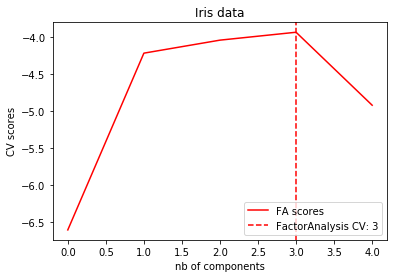

In [18]:
import matplotlib.pyplot as plt
plt.plot(n_components, fa_scores, 'r', label='FA scores')
plt.axvline(n_components_fa, color='r',
                label='FactorAnalysis CV: %d' % n_components_fa,
                linestyle='--')
plt.xlabel('nb of components')
plt.ylabel('CV scores')
plt.legend(loc='lower right')
plt.title("Iris data")


In [15]:
transformer = FactorAnalysis(n_components=3, random_state=0)
X_transformed = transformer.fit_transform(X)
x_transformed = transformer.fit_transform(x_normal)

X_transformed.shape

(150, 3)

In [16]:
X_transformed

array([[-1.31657584,  0.58376734, -0.0133159 ],
       [-1.3265123 , -0.33859389, -0.40743948],
       [-1.39569205, -0.29783617,  0.1118703 ],
       [-1.33013843, -0.61005254, -0.01994807],
       [-1.33237482,  0.59118075,  0.21687299],
       [-1.11359959,  1.35692878,  0.52358422],
       [-1.34475601, -0.21446649,  0.68007952],
       [-1.28860402,  0.29748185, -0.08620226],
       [-1.38694019, -1.10483086,  0.01107522],
       [-1.32427272, -0.19864391, -0.61918058],
       [-1.24706961,  1.20501624, -0.15245645],
       [-1.27643118,  0.01860979,  0.07110026],
       [-1.37146449, -0.43306763, -0.57420294],
       [-1.54773227, -0.98762793,  0.1431794 ],
       [-1.3182806 ,  2.19034329, -0.04191463],
       [-1.16612225,  2.45762237,  0.92745455],
       [-1.26392678,  1.46065231,  0.75931224],
       [-1.28432813,  0.55177048,  0.26156482],
       [-1.10463938,  1.6344534 , -0.19771992],
       [-1.25602983,  0.92749162,  0.56884768],
       [-1.16262252,  0.75150245, -0.636

In [17]:
x_transformed

array([[-1.3166042 ,  0.58360053, -0.01443531],
       [-1.32647557, -0.33983939, -0.40748814],
       [-1.39568915, -0.29771026,  0.11204791],
       [-1.33005713, -0.60989029, -0.01868632],
       [-1.33240495,  0.5917111 ,  0.21603149],
       [-1.11373439,  1.35796212,  0.52123133],
       [-1.34480139, -0.21289229,  0.68035429],
       [-1.28858426,  0.29732851, -0.08656708],
       [-1.38685349, -1.10471033,  0.01285748],
       [-1.32414852, -0.19988822, -0.6185365 ],
       [-1.2471114 ,  1.2045473 , -0.15444784],
       [-1.27636507,  0.01916704,  0.07176794],
       [-1.37135274, -0.43434424, -0.57346338],
       [-1.5476712 , -0.98725387,  0.14468766],
       [-1.31847477,  2.18949012, -0.04652126],
       [-1.16639074,  2.45934479,  0.92302032],
       [-1.26418271,  1.46159414,  0.75564113],
       [-1.28442348,  0.55197865,  0.26000867],
       [-1.10472148,  1.63372689, -0.20061692],
       [-1.25612431,  0.92878253,  0.5674004 ],
       [-1.16257433,  0.75001941, -0.637